In [ ]:
print("Bissmillahirrahmanirrahim top 50 product capstone")


Bissmillahirrahmanirrahim top 50 product capstone


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


downloading our facential datasets

In [ ]:
#Download the training set

!wget https://storage.googleapis.com/facentiap-dataset-zip/faceSkin_tipe_train.zip

--2023-06-08 13:55:17--  https://storage.googleapis.com/facentiap-dataset-zip/faceSkin_tipe_train.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.175.128, 172.253.118.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.175.128|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2023-06-08 13:55:17 ERROR 403: Forbidden.



In [ ]:
#Download the validation set

!wget https://storage.googleapis.com/facentiap-dataset-zip/faceSkin_tipe_validation.zip


--2023-06-08 13:55:17--  https://storage.googleapis.com/facentiap-dataset-zip/faceSkin_tipe_validation.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.175.128, 172.253.118.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.175.128|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2023-06-08 13:55:17 ERROR 403: Forbidden.



download the pretrained model (VGGFACE)


In [ ]:

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:

!wget https://storage.googleapis.com/facentiap-dataset-zip/vgg_face_weights.h5


--2023-06-06 04:14:14--  https://storage.googleapis.com/facentiap-dataset-zip/vgg_face_weights.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.128, 142.251.10.128, 142.251.12.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 580085408 (553M) [application/octet-stream]
Saving to: ‘vgg_face_weights.h5’

vgg_face_weights.h5 100%[===================>] 553.21M  59.3MB/s    in 10s     

2023-06-06 04:14:24 (53.7 MB/s) - ‘vgg_face_weights.h5’ saved [580085408/580085408]



unzip validation dan train dataset


In [ ]:
import os
import zipfile

# Unzip training set
local_zip = './faceSkin_tipe_train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./faceSkin_tipe_train')

# Unzip validation set
local_zip = './faceSkin_tipe_validation.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./faceSkin_tipe_validation')

zip_ref.close()

 define the directories containing your images

In [ ]:
# variabel directory for training pict for each category
train_oily_dir = os.path.join("./faceSkin_tipe_train/oily")
train_normal_dir = os.path.join("./faceSkin_tipe_train/normal")
train_combination_dir =os.path.join("./faceSkin_tipe_train/combination")
train_sensitive_dir = os.path.join("./faceSkin_tipe_train/sensitive")
train_dry_dir = os.path.join("./faceSkin_tipe_train/dry")
train_nonface_dir = os.path.join("./faceSkin_tipe_train/nonface")

# variabel directory for validation pict for each category
validation_oily_dir =os.path.join("./faceSkin_tipe_validation/oily")
validation_normal_dir =os.path.join("./faceSkin_tipe_validation/normal")
validation_combination_dir =os.path.join("./faceSkin_tipe_validation/combination")
validation_sensitive_dir =os.path.join("./faceSkin_tipe_validation/sensitive")
validation_dry_dir =os.path.join("./faceSkin_tipe_validation/dry")
validation_nonface_dir =os.path.join("./faceSkin_tipe_validation/nonface")

filenames check in directory

In [ ]:
train_dry_names = os.listdir(train_dry_dir)
train_oily_names = os.listdir(train_oily_dir)
train_normal_names =  os.listdir(train_normal_dir)
train_combination_names =  os.listdir(train_combination_dir)
train_sensitive_names =  os.listdir(train_sensitive_dir)
train_nonface_names =  os.listdir(train_nonface_dir)

validation_dry_names = os.listdir(validation_dry_dir)
validation_oily_names = os.listdir(validation_oily_dir)
validation_normal_names =  os.listdir(validation_normal_dir)
validation_combination_names =  os.listdir(validation_combination_dir)
validation_sensitive_names =  os.listdir(validation_sensitive_dir)
validation_nonface_names =  os.listdir(validation_nonface_dir)

print(f'TRAIN SET DRY: {train_dry_names[:5]}')
print(f'TRAIN SET OILY: {train_dry_names[:5]}')
print(f'TRAIN SET SENSITIVE: {train_dry_names[:5]}')
print(f'TRAIN SET COMBINATION: {train_dry_names[:5]}')
print(f'TRAIN SET NORMAL: {train_dry_names[:5]}')


print(f'VALIDATION SET DRY: {validation_dry_names[:5]}')
print(f'VALIDATION SET OILY: {validation_dry_names[:5]}')
print(f'VALIDATION SET SENSITIVE: {validation_dry_names[:5]}')
print(f'VALIDATION SET COMBINATION: {validation_dry_names[:5]}')
print(f'VALIDATION SET NORMAL: {validation_dry_names[:5]}')


TRAIN SET DRY: ['1 (93).jpg', 'm1-033-01.jpg', '1 (55).jpg', 'm-029-01.jpg', '1 (76).jpg']
TRAIN SET OILY: ['1 (93).jpg', 'm1-033-01.jpg', '1 (55).jpg', 'm-029-01.jpg', '1 (76).jpg']
TRAIN SET SENSITIVE: ['1 (93).jpg', 'm1-033-01.jpg', '1 (55).jpg', 'm-029-01.jpg', '1 (76).jpg']
TRAIN SET COMBINATION: ['1 (93).jpg', 'm1-033-01.jpg', '1 (55).jpg', 'm-029-01.jpg', '1 (76).jpg']
TRAIN SET NORMAL: ['1 (93).jpg', 'm1-033-01.jpg', '1 (55).jpg', 'm-029-01.jpg', '1 (76).jpg']
TRAIN SET NONFACE: ['000000036936.jpg', '000000003845.jpg', '000000029984.jpg', '000000011699.jpg', '000000029596.jpg'] 

VALIDATION SET DRY: ['f-013-01.jpg', '1 (32).jpg', 'f-009-01.jpg', '1 (72).jpg', 'f-012-01.jpg']
VALIDATION SET OILY: ['f-013-01.jpg', '1 (32).jpg', 'f-009-01.jpg', '1 (72).jpg', 'f-012-01.jpg']
VALIDATION SET SENSITIVE: ['f-013-01.jpg', '1 (32).jpg', 'f-009-01.jpg', '1 (72).jpg', 'f-012-01.jpg']
VALIDATION SET COMBINATION: ['f-013-01.jpg', '1 (32).jpg', 'f-009-01.jpg', '1 (72).jpg', 'f-012-01.jpg']
VA

chacking total number of images for each categories in training and validation directories 

In [ ]:
print(f'total training oily images: {len(os.listdir(train_oily_dir))}')
print(f'total training dry images: {len(os.listdir(train_dry_dir))}')
print(f'total training normal images: {len(os.listdir(train_normal_dir))}')
print(f'total training combination images: {len(os.listdir(train_combination_dir))}')
print(f'total training sensitive images: {len(os.listdir(train_sensitive_dir))}')
print(f'total training nonface images: {len(os.listdir(train_nonface_dir))}\n')


print(f'total validation oily images: {len(os.listdir(validation_oily_dir))}')
print(f'total validation dry images: {len(os.listdir(validation_dry_dir))}')
print(f'total validation normal images: {len(os.listdir(validation_normal_dir))}')
print(f'total validation combination images: {len(os.listdir(validation_combination_dir))}')
print(f'total validation sensitive images: {len(os.listdir(validation_sensitive_dir))}')
print(f'total validation nonface images: {len(os.listdir(validation_nonface_dir))}')





total training oily images: 128
total training dry images: 107
total training normal images: 88
total training combination images: 58
total training sensitive images: 86
total training nonface images: 400

total validation oily images: 32
total validation dry images: 26
total validation normal images: 22
total validation combination images: 14
total validation sensitive images: 21
total validation nonface images: 100


# Data preprocessing


using image data generator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
      rescale=1/255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      #zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(
      rescale=1/255,
      
      )

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './faceSkin_tipe_train',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 600x600
        batch_size=5,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='categorical')

# Flow validation images in batches of 128 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        './faceSkin_tipe_validation',  # This is the source directory for validation images
        target_size=(224, 224),  # All images will be resized to 600x600
        batch_size=5,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='categorical')

Found 467 images belonging to 5 classes.
Found 115 images belonging to 5 classes.


load pretrained model

In [ ]:
!python --version

Python 3.10.11


solusi kalo cell dibawah ga worked https://shubhasmitaroy.medium.com/for-those-who-get-an-error-on-importing-vggface-related-packages-e5afdd0c3f01

In [ ]:
!pip install keras_vggface

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install keras_applications

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.7 MB/s eta 0:00:00


In [ ]:
# from keras.engine.topology import get_source_inputs

# to

# from keras.utils.layer_utils import get_source_inputs

In [ ]:
import keras

from keras_vggface.vggface import VGGFace
from tensorflow.keras import layers

# Set the weights file you downloaded into a variable
local_weights_file = '/content/vgg_face_weights.h5'

# Initialize the base model.
# Set the input shape and remove the dense layers.
pre_trained_model = VGGFace(input_shape = (224, 224, 3), 
                                include_top = False, 
                                model = 'vgg16')

# Load the pre-trained weights you downloaded.
pre_trained_model.load_weights(local_weights_file, by_name=True, skip_mismatch=True)

# Freeze the weights of the layers.
for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
pre_trained_model.summary()


Model: "vggface_vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)     

In [ ]:
# Choose `mixed_7` as the last layer of your base model
last_layer = pre_trained_model.get_layer('pool5')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output
print('last layer output: ', last_output)

last layer output shape:  (None, 7, 7, 512)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 512), dtype=tf.float32, name=None), name='pool5/MaxPool:0', description="created by layer 'pool5'")


# add dense layer depends on the classification (5 category)


In [ ]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation=None)(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (5, activation='softmax')(x)           

# Append the dense network to the base model
model = Model(pre_trained_model.input, x) 

# Print the model summary. See your dense network connected at the end.
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)       0   

# Building Model (klo ga pake transfer learning)

In [ ]:

# model = tf.keras.models.Sequential([
#     # Note the input shape is the desired size of the image 150x150 with 3 bytes color
#     # This is the first convolution
#     tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(600, 600, 3)),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     # The second convolution
#     tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The third convolution
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The fourth convolution
#     #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     #tf.keras.layers.MaxPooling2D(2,2),
#     # The fifth convolution
#     #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     #tf.keras.layers.MaxPooling2D(2,2),
#     # Flatten the results to feed into a DNN
#     tf.keras.layers.Flatten(),
#     # 512 neuron hidden layer
#     tf.keras.layers.Dense(512, activation='relu'),
    
#     # will give a 5 output value, 
#     tf.keras.layers.Dense(5, activation='softmax')
# ])

compiling the model

In [ ]:
from tensorflow.keras.optimizers import RMSprop
from keras.optimizers import adam

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer= tf.keras.optimizers.Adam(learning_rate = 0.0001),
              metrics=['accuracy'])

Training

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=32,  
      epochs=300,
      verbose=2,
      validation_data = validation_generator,
      validation_steps=16)

Epoch 1/300
32/32 - 9s - loss: 1.6571 - accuracy: 0.3694 - val_loss: 1.4324 - val_accuracy: 0.4250 - 9s/epoch - 288ms/step
Epoch 2/300
32/32 - 7s - loss: 1.4186 - accuracy: 0.4375 - val_loss: 1.4576 - val_accuracy: 0.4500 - 7s/epoch - 221ms/step
Epoch 3/300
32/32 - 7s - loss: 1.2972 - accuracy: 0.5188 - val_loss: 1.6203 - val_accuracy: 0.4250 - 7s/epoch - 221ms/step
Epoch 4/300
32/32 - 7s - loss: 1.2633 - accuracy: 0.4812 - val_loss: 1.6621 - val_accuracy: 0.4125 - 7s/epoch - 219ms/step
Epoch 5/300
32/32 - 7s - loss: 1.4276 - accuracy: 0.4459 - val_loss: 1.6005 - val_accuracy: 0.4625 - 7s/epoch - 232ms/step
Epoch 6/300
32/32 - 7s - loss: 1.2604 - accuracy: 0.5096 - val_loss: 1.6431 - val_accuracy: 0.4000 - 7s/epoch - 230ms/step
Epoch 7/300
32/32 - 7s - loss: 1.1830 - accuracy: 0.5375 - val_loss: 1.4328 - val_accuracy: 0.4375 - 7s/epoch - 229ms/step
Epoch 8/300
32/32 - 6s - loss: 1.1084 - accuracy: 0.5500 - val_loss: 1.8512 - val_accuracy: 0.3875 - 6s/epoch - 191ms/step
Epoch 9/300
32/3

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# evaluating accuracy and loss for the model


<Figure size 640x480 with 0 Axes>

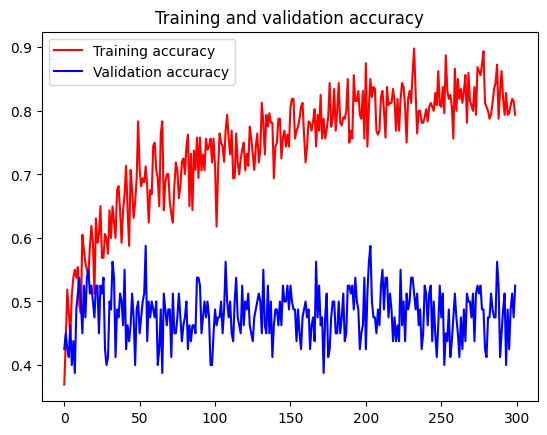

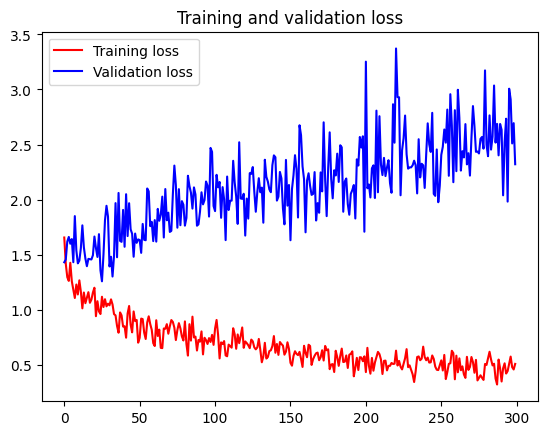

<Figure size 640x480 with 0 Axes>

In [ ]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss , 'r', label='Training loss')
plt.plot  ( epochs, val_loss , 'b', label='Validation loss')
plt.title ('Training and validation loss'   )
plt.legend(loc=0)
plt.figure()


# menyimpan model TAPI BELUM YANG VERSI QUANTIZED 

In [ ]:

from keras.models import load_model

model.save('/content/drive/MyDrive/saved model/model_vggFace_1juni.h5')

# Convert to Tensorflow LITE

In [ ]:
try:
    %tensorflow_version 2.x
except:
    pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import pathlib

print('\u2022 Using TensorFlow Version:', tf.__version__)

• Using TensorFlow Version: 2.12.0


In [ ]:
!mkdir saved_TFLITE_model

generate SavedModel

In [ ]:
export_dir = "/content/saved_TFLITE_model"
tf.saved_model.save(model, export_dir)

In [ ]:
model = tf.saved_model.load(export_dir)

In [ ]:
import shutil

source_dir = r"/content/saved_TFLITE_model"
destination_dir = r"/content/drive/MyDrive/SavedModel_format"
shutil.copytree(source_dir, destination_dir, dirs_exist_ok=True)



'/content/drive/MyDrive/SavedModel_format'

Convert the SavedModel to JSON

In [ ]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflowjs
import json

In [ ]:


# Load the SavedModel
model = tf.saved_model.load('/content/drive/MyDrive/SavedModel_format')


In [ ]:
import tensorflow as tf
import json

# Load the SavedModel
model = tf.saved_model.load(export_dir)

# Convert tensor shapes to lists
def convert_shape(shape):
    return [dim for dim in shape.as_list()]

# Create a dictionary to store the JSON model
json_model = {}

# Get information about inputs
input_signatures = model.signatures['serving_default'].structured_input_signature[1]
json_model['inputs'] = []
for tensor_name, tensor_info in input_signatures.items():
    input_info = {
        'name': tensor_name,
        'dtype': str(tensor_info.dtype),
        'shape': convert_shape(tensor_info.shape),
    }
    json_model['inputs'].append(input_info)

# Get information about outputs
output_signatures = model.signatures['serving_default'].structured_outputs
json_model['outputs'] = []
for tensor_name, tensor_info in output_signatures.items():
    output_info = {
        'name': tensor_name,
        'dtype': str(tensor_info.dtype),
        'shape': convert_shape(tensor_info.shape),
    }
    json_model['outputs'].append(output_info)

# Save the JSON model to a file
with open('model.json', 'w') as f:
    json.dump(json_model, f)


In [ ]:
shutil.copy("/content/model.json","/content/drive/MyDrive/saved model")

'/content/drive/MyDrive/saved model/model.json'

Convert the SavedModel to TFLite

In [ ]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

# Set the optimization flags for quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT] # INTINYA DISINI UNTUK MELAKUKAN QUANTIZED

# Specify the input and output tensors (if necessary)
# converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
# converter.target_spec.supported_types = [tf.int8]

tflite_model = converter.convert()

In [ ]:
tflite_model_file = pathlib.Path('/content/drive/MyDrive/saved model/model_VGGFace_quantized_1_juni.tflite')
tflite_model_file.write_bytes(tflite_model)

40468464

# labels

In [ ]:
class_names = ['combination', 'dry', 'normal', 'oily', 'sensitive']


create a txt file to save the 5 labels

In [ ]:
with open('faces_labels.txt', 'w') as f:
    f.write('\n'.join(class_names))

In [ ]:
import shutil
shutil.copy("/content/faces_labels.txt","/content/drive/MyDrive/saved model")

'/content/drive/MyDrive/saved model/faces_labels.txt'

## Download the TFLite Model File

If you are running this notebook in a Colab, you can run the cell below to download the tflite model to your local disk. 

**Note**: If the file does not download when you run the cell, try running the cell a second time.

In [ ]:
try:
    from google.colab import files
    files.download(tflite_model_file)
except:
    pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Perform Inference and Input data

In [ ]:
# import tensorflow as tf

# interpreter = tf.lite.Interpreter(model_path="/content/drive/MyDrive/saved model/model_VGGFace_quantized.tflite")
# interpreter.allocate_tensors()

# # Print input shape and type
# inputs = interpreter.get_input_details()
# print('{} input(s):'.format(len(inputs)))
# for i in range(0, len(inputs)):
#     print('{} {}'.format(inputs[i]['shape'], inputs[i]['dtype']))

# # Print output shape and type
# outputs = interpreter.get_output_details()
# print('\n{} output(s):'.format(len(outputs)))
# for i in range(0, len(outputs)):
#     print('{} {}'.format(outputs[i]['shape'], outputs[i]['dtype']))

In [ ]:
# inference dengan model machine learning format keras .h5

def preprocess_image(image):
    # Normalize pixel values to the range [0, 1]
    image = image / 255.0

    # Perform any other preprocessing steps such as resizing, cropping, etc.
    # ...

    return image

import tensorflow as tf
from tensorflow.keras.models import load_model

# Load the model
model = load_model('/content/drive/MyDrive/saved model/model_vggFace_1juni.h5')

# Load and preprocess the image
image = tf.keras.preprocessing.image.load_img('/content/1 (170).jpg', target_size=(224,224))
image = tf.keras.preprocessing.image.img_to_array(image)
image = preprocess_image(image)  # Preprocess the image as per your model's requirements

# Add a batch dimension to the image
image = tf.expand_dims(image, axis=0)

# Perform inference
predictions = model.predict(image)

# Process the predictions as per your requirements


1/1 [==============================] - 1s 623ms/step


In [ ]:
# Perform inference
predictions = model(image)

# Access the predicted class or values
predicted_classes = tf.argmax(predictions, axis=1)
print("Predicted classes:", predicted_classes)

# Or, access specific elements of the predictions
# prediction_value = predictions[0][0]  # Example for a specific element

# Process the predictions further as per your requirements


Predicted classes: tf.Tensor([3], shape=(1,), dtype=int64)


In [ ]:
class_labels = {0: 'combination', 1: 'dry', 2: 'normal', 3:"oily", 4:"sensitive" }  # Example mapping of class indices to labels

predicted_classes = tf.argmax(predictions, axis=1)

for predicted_class in predicted_classes:
    predicted_label = class_labels[predicted_class.numpy()]
    print("Predicted label:", predicted_label)

Predicted label: oily
